# New section

In [ ]:
import os
AKSHARDHAM_dir = os.path.join('/content/drive/MyDrive/train/AKSHARDHAM_IMAGES')
india_gate_dir = os.path.join('/content/drive/MyDrive/train/india_gate')
lotus_temple_dir = os.path.join("/content/drive/MyDrive/train/loutus_temple")
qutub_minar_dir = os.path.join('/content/drive/MyDrive/train/qutub_minar')
RED_FORT_dir = os.path.join('/content/drive/MyDrive/train/RED FORT')

print('total training AKSHARDHAM images:', len(os.listdir(AKSHARDHAM_dir)))
print('total training india gate images:', len(os.listdir(india_gate_dir)))
print('total training lotus temple images:', len(os.listdir(lotus_temple_dir)))
print('total training qutub minar images:', len(os.listdir(qutub_minar_dir)))
print('total training RED FORT images:', len(os.listdir(RED_FORT_dir)))

AKSHARDHAM_files = os.listdir(AKSHARDHAM_dir)
print(AKSHARDHAM_files[:10])

india_gate_files = os.listdir(india_gate_dir)
print(india_gate_files[:10])

lotus_temple_files = os.listdir(lotus_temple_dir)
print(lotus_temple_files[:10])

qutub_minar_files = os.listdir(qutub_minar_dir)
print(qutub_minar_files[:10])

RED_FORT_files = os.listdir(RED_FORT_dir)
print(RED_FORT_files[:10])

total training AKSHARDHAM images: 408
total training india gate images: 425
total training lotus temple images: 116
total training qutub minar images: 367
total training RED FORT images: 967
['AKSHARDHAM IMAGES_159.jpeg', 'AKSHARDHAM IMAGES_166.jpeg', 'AKSHARDHAM IMAGES_147.jpeg', 'AKSHARDHAM IMAGES_165.jpeg', 'AKSHARDHAM IMAGES_157.jpeg', 'AKSHARDHAM IMAGES_155.jpeg', 'AKSHARDHAM IMAGES_156.jpeg', 'AKSHARDHAM IMAGES_142.jpeg', 'AKSHARDHAM IMAGES_14.jpeg', 'AKSHARDHAM IMAGES_143.jpeg']
['india gate_295.jpeg', 'india gate_218.jpeg', 'india gate_65.jpeg', 'india gate_447.jpeg', 'india gate_142.jpeg', 'india gate_118.jpeg', 'india gate_117.jpeg', 'india gate_116.png', 'india gate_114.jpeg', 'india gate_113.jpeg']
['loutus temple_243.jpeg', 'loutus temple_30.jpeg', 'loutus temple_169.jpeg', 'loutus temple_454.jpeg', 'loutus temple_315.jpeg', 'loutus temple_96.jpeg', 'loutus temple_240.png', 'loutus temple_236.jpeg', 'loutus temple_23.jpeg', 'loutus temple_256.jpeg']
['372.jpg', '377.jpg', 

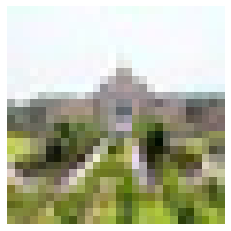

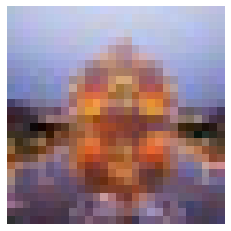

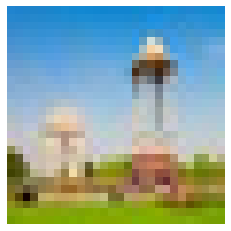

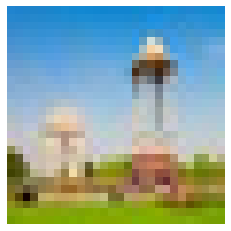

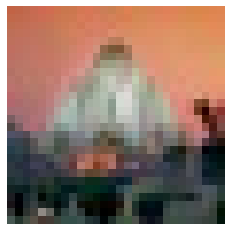

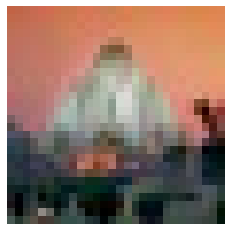

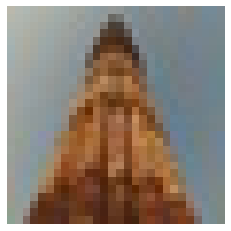

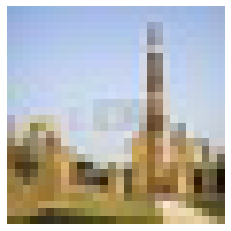

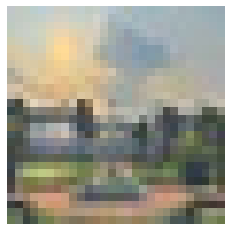

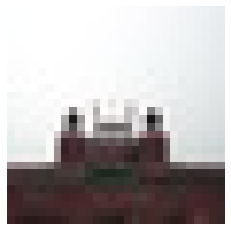

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_AKSHARDHAM = [os.path.join(AKSHARDHAM_dir, fname) 
                for fname in AKSHARDHAM_files[pic_index-2:pic_index]]
next_india_gate = [os.path.join(india_gate_dir, fname) 
                for fname in india_gate_files[pic_index-2:pic_index]]
next_lotus_temple = [os.path.join(lotus_temple_dir, fname) 
                for fname in lotus_temple_files[pic_index-2:pic_index]]
next_qutub_minar = [os.path.join(qutub_minar_dir, fname) 
                for fname in qutub_minar_files[pic_index-2:pic_index]]
next_RED_FORT = [os.path.join(RED_FORT_dir, fname) 
                for fname in RED_FORT_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_AKSHARDHAM+next_india_gate+next_lotus_temple+next_qutub_minar+next_RED_FORT):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import os
from PIL import Image
folder_path = '/content/drive/MyDrive/train'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        im = im.resize((28,28),Image.ANTIALIAS)
        rgb_im = im.convert('RGB')
        rgb_im.save(file_path,quality=95,optimize=True)
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

In [ ]:
import os
from PIL import Image
folder_path = '/content/drive/MyDrive/validation'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        im = im.resize((28,28),Image.ANTIALIAS)
        rgb_im = im.convert('RGB')
        rgb_im.save(file_path,quality=95,optimize=True)
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/MyDrive/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/validation/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(28, 28),
	class_mode='categorical',
  batch_size=120
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(28, 28),
	class_mode='categorical',
  batch_size=16
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(150, (3,3), activation='relu', input_shape=(28 , 28, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(150, (3,3), activation='relu', input_shape=(28 , 28, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(612, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=50, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=1)

model.save("train.h5")

Found 2283 images belonging to 5 classes.
Found 704 images belonging to 5 classes.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 150)       4200      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 150)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 150)       202650    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 150)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 3750)              0         
                                     

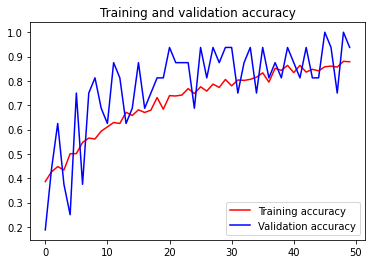

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()